In [30]:
from sklearn.datasets import fetch_openml

In [31]:
mnist=fetch_openml('mnist_784',version=1)

In [50]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [60]:
X,y=mnist["data"],mnist["target"]

In [64]:
X[:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
X.shape

(70000, 784)

In [68]:
y.shape

(70000,)

In [69]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np

In [70]:
some_digit=X[0]

In [71]:
some_digit_image=some_digit.reshape(28,28)  #grap instances features vector and reshape it 28 by 28 array and display it as matplotlibs imshow() function

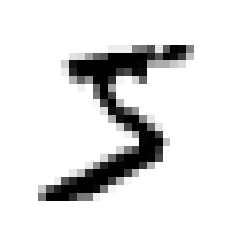

In [72]:
plt.imshow(some_digit_image, cmap=mlp.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [77]:
some_digit2=X[7]
some_digit2_image=some_digit2.reshape(28,28) 

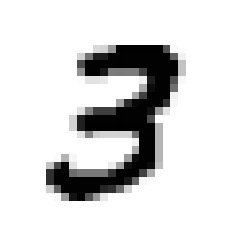

In [79]:
plt.imshow(some_digit2_image,cmap=mlp.cm.binary)
plt.axis("off")
plt.show()

In [12]:
y[0]  # label tells that its 5, 

'5'

In [13]:
y=y.astype(np.uint8) # label is string so lets cast y to integer

In [80]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [15]:
X_train, X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:] 
#[:60000]- first 60,000 
#elements, [60000:]- elements after
#elements are shuffled for us, to cross valudation folds will be similar

In [81]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
sgd_clf.predict([some_digit])

array([ True])

Classifier guessed it right so image represents 5(true)

## Performance Measures
Usually evaluating a classifier is always tricy, hence we will learn Performance measures of classifier in this chapter below

### Measuting accuracy using cross validation (classification)

<font color=red>Cross validation</font> for classifcation is absent, hence we will write our own cross vaidation code. It is straightforward like we implemented in regression models we used in previous chapter. 


we will use stratified k-folds cross validator- This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

__Parameters__
n_splitsint, default=5
Number of folds. Must be at least 2.

Changed in version 0.22: n_splits default value changed from 3 to 5.

shuffleboolean, optional
Whether to shuffle each class’s samples before splitting into batches.

random_stateint, RandomState instance or None, optional, default=None
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random. Only used when shuffle is True. This should be left to None if shuffle is False.

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [20]:
skfolds=StratifiedKFold(n_splits=3)

In [21]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_fold=X_train[test_index]
    y_test_fold=y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

0.95035
0.96035
0.9604


In [22]:
test_index

array([39988, 39989, 39990, ..., 59997, 59998, 59999])

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [27]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X,y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)
    

In [28]:
never_5_clf=Never5Classifier()

In [29]:
cross_val_score(never_5_clf, X_train, y_train_5,cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [82]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf, X_train,y_train_5, cv =3)

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

# first row 1, col 1 -s True negatives means that model correctly classified as non5s
# 1, col 2- False positives- wrongly classified as 5s
# row 2, col 1- worngly classified as non 5s(false negative)
# row 2, col 2- correctly classified as 5s(true positives)

array([[53892,   687],
       [ 1891,  3530]])